In [3]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
import json
from pandas.io.json import json_normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

## Read in preprocessed data

In [5]:
X_train = pd.read_csv('train_dataset.csv', sep = '\t', index_col = 0)
#cuisines = pd.read_csv('train_dataset.csv', sep = '\t', usecols = ['cuisine'])
#cuisines.set_index(X_train.index, inplace = True)

In [4]:
print("Number of recipes: %i, number of ingredients: %i" % (X_train.shape[0], X_train.shape[1]))

Number of recipes: 37340, number of ingredients: 267


## PCA

In [3]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'navy', 'turquoise', 'darkorange', 'black', 'coral', 'fuchsia', 'lightblue', 'grey', 'lavender', 'plum', 'tan', 'teal', 'violet', 'salmon', 'darkgreen']

In [4]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X_train.iloc[:, :-2])

In [102]:
print('explained variance ratio (5 components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (5 components): [0.04258254 0.02934325 0.0248484  0.02242304 0.0207587 ]


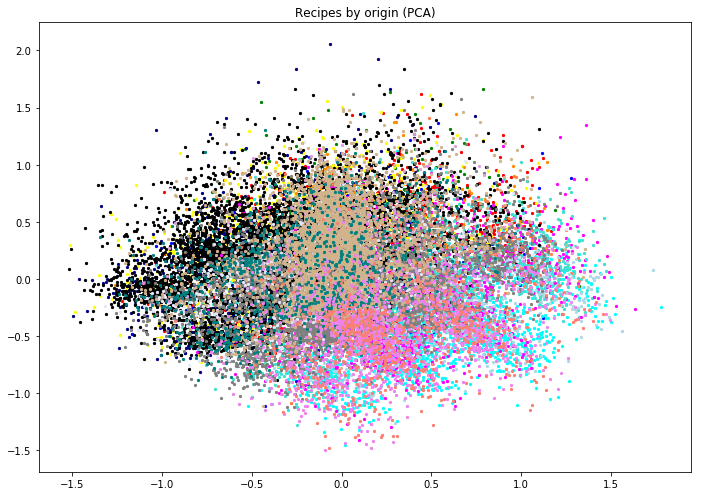

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.title("Recipes by origin (PCA)")
for i, cur_origin in enumerate(np.unique(cuisines)):
    plt.scatter(X_pca[(cuisines == cur_origin)['cuisine'], 1], X_pca[(cuisines == cur_origin)['cuisine'], 2], 
                c = colors[i], label = cur_origin, s = 5)
plt.savefig("pca.png")

## t-SNE

In [ ]:
pca = PCA(n_components=5)
X = pca.fit_transform(X_train.iloc[:, :-2])  
tsne = TSNE(n_components = 2, perplexity = 15, early_exaggeration = 30)
X_tsne = tsne.fit_transform(X)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.title("Recipes by origin (t-SNE)")
for i, cur_origin in enumerate(np.unique(cuisines)):
    plt.scatter(X_tsne[(cuisines == cur_origin)['cuisine'], 0], X_tsne[(cuisines == cur_origin)['cuisine'], 1], 
                c = colors[i], label = cur_origin, s = 5)

plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.savefig("results/t-sne_plot.png")
plt.show()

## Original code

In [103]:
X = pd.read_csv('train_dataset.csv', sep = '\t', index_col = 0).drop('cuisine', axis = 1)
cuisines = pd.read_csv('train_dataset.csv', sep = '\t', usecols = ['cuisine'])
cuisines.set_index(X.index, inplace = True)

X['cuisine'] = np.array(cuisines)

In [104]:
X_train['cuisine'] = np.array(cuisines)

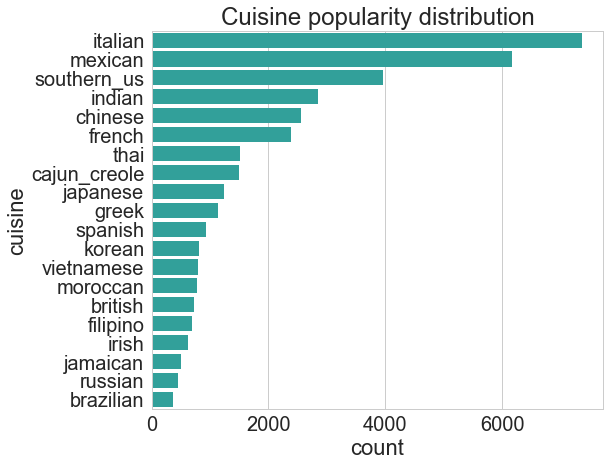

In [105]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)

cuisine_counts = X_train.groupby('cuisine').cuisine.count()
cuisine_counts = pd.DataFrame({'cuisine': cuisine_counts.index, 'count': cuisine_counts.values})
cuisine_counts = cuisine_counts.sort_values(['count'], ascending=False)
sns.set(font_scale=2)
sns.set_style("whitegrid")

plt.title("Cuisine popularity distribution")

_ = sns.barplot(ax=ax, x='count', y='cuisine', data=cuisine_counts, orient='h', label='big', color='lightseagreen')
plt.tight_layout()
fig.savefig('cuisine_popularity.pdf', dpi=200)

In [118]:
X = pd.read_csv('train_dataset.csv', sep = '\t', index_col = 0).drop('cuisine', axis = 1)
cuisines = pd.read_csv('train_dataset.csv', sep = '\t', usecols = ['cuisine'])
cuisines.set_index(X.index, inplace = True)

X_transposed = X.transpose()

In [119]:
X_transposed['frequency'] = X_transposed.sum(axis=1)

In [120]:
X_transposed

,10259,25693,20130,13162,6602,42779,3735,16903,12734,5875,...,6153,25557,24348,7377,29109,11462,2238,41882,2362,frequency
active_dry_yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,357
allpurpose_flour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4563
avocado,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1279
bacon,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1124
baguette,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,266
baking_soda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,934
basil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,465
beans,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1489
beansprouts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,454
beef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,807


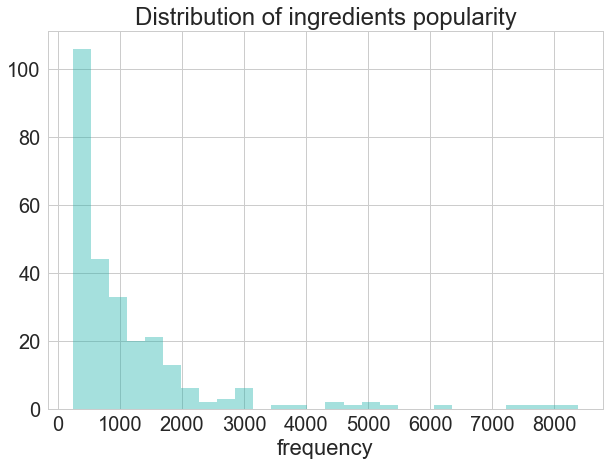

In [123]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)

plt.title("Distribution of ingredients popularity")
ax = sns.distplot(X_transposed['frequency'], kde=False, label="big", color='lightseagreen')
ax.set(xlabel='Ingredient freguency', ylabel='Ingredient counts')
plt.tight_layout()
fig.savefig('ingredients_popularity.pdf', dpi=200)

In [79]:
X_transposed.sort_values('count')

,10259,25693,20130,13162,6602,42779,3735,16903,12734,5875,...,25557,24348,7377,29109,11462,2238,41882,2362,count,frequency
peaches,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,243.0,486.0
leaves_mint,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,247.0,494.0
dry_sherry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,252.0,504.0
vegetable_cooking_spray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,256.0,512.0
flank_steak,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,257.0,514.0
mango,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,259.0,518.0
olives_green,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,263.0,526.0
leaves_basil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,264.0,528.0
okra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,266.0,532.0
baguette,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,266.0,532.0


In [90]:
X_train.sort_values("number_of_ingredients")

,active_dry_yeast,allpurpose_flour,avocado,bacon,baguette,baking_soda,basil,beans,beansprouts,beef,...,vegetable,potatoes_sweet,vegetable_cooking_spray,vinegar_white,onion_white,pepper_white,vinegar_white_wine,pepper_yellow_bell,cuisine,number_of_ingredients
39607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,greek,2
30910,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,irish,3
48754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,french,3
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,chinese,3
3593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,italian,3
19167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,french,3
3638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,indian,3
22869,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,filipino,3
8454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,jamaican,3
10106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,japanese,3


In [81]:
X_train["number_of_ingredients"] = X_train.iloc[:, :-2].sum(axis=1)

In [82]:
X_train.shape 

(37340, 269)

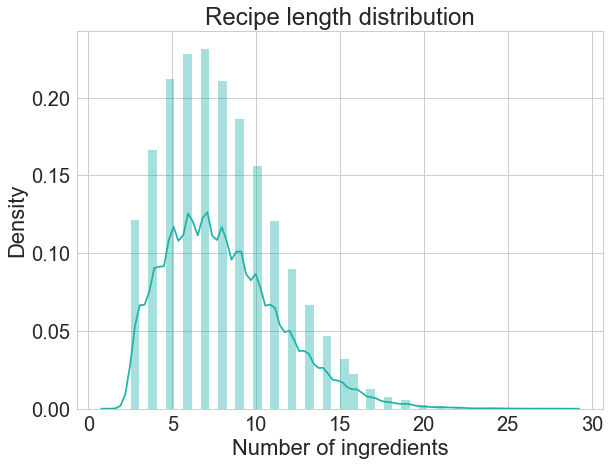

In [124]:
# number of ingredients per recipe

fig, ax = plt.subplots()
fig.set_size_inches(9, 7)

plt.title("Recipe length distribution")
ax = sns.distplot(X_train['number_of_ingredients'], kde=True, label="big",color='lightseagreen')
ax.set(xlabel='Number of ingredients', ylabel='Density')
plt.tight_layout()
fig.savefig('recipes_length.pdf', dpi=200)

In [126]:
X_train['number_of_ingredients'].kurtosis()

0.7575550196296468

In [ ]:
pca   = PCA(n_components=2)
X_pca = pca.fit_transform(X.iloc[:, :-3])

In [ ]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

In [ ]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'navy', 
          'turquoise', 'darkorange', 'black', 'coral', 'fuchsia', 'lightblue', 
          'grey', 'lavender', 'plum', 'tan', 'teal', 'violet', 'salmon', 'darkgreen']

In [ ]:
cuisines = X['cuisine'].values
print(len(set(cuisines)))
print(len(colors))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.title("First 2 PCA components")
for i, cur_cuisine in enumerate(set(cuisines)):
    plt.scatter(X_pca[cuisines == cur_cuisine, 0], X_pca[cuisines == cur_cuisine, 1], c=colors[i])

fig.savefig('pca.pdf')

In [ ]:
# group by location
print(set(cuisines))

In [ ]:
west = ['french', 'irish', 'british', 'russian', 'cajun_creole'] # Europe and US
east = ['chinese', 'vietnamese', 'japanese', 'filipino', 'korean', 'thai']
south = ['southern_us', 'jamaican', 'mexican', 'brazilian']
mediterranean = ['greek', 'spanish', 'italian', 'moroccan']
indian = ['indian']

def label_origin(row):
    if row['cuisine'] in west:
        return 'west'
    if row['cuisine'] in east:
        return 'east'
    if row['cuisine'] in mediterranean:
        return 'mediterranean'
    if row['cuisine'] in indian:
        return 'indian'
    if row['cuisine'] in south:
        return 'south'

X['origin'] = X.apply (lambda row: label_origin(row),axis=1)

    
colors = ['blue', 'green', 'red', 'yellow', 'pink']
origins = X['origin'].values

# smarter method...

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.iloc[:, :-3])

In [ ]:
print(set(origins))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.title("Recipes by origin")
for i, cur_origin in enumerate(set(origins)):
    plt.scatter(X_pca[origins == cur_origin, 0], X_pca[origins == cur_origin, 1], c=colors[i])

fig.savefig('pca_origins.pdf')

interpretation: 2 first PCA components aren't enough to represent the data (explained variance ratio (first two components): [0.0298653  0.02821523])

# PCA on the transposed matrix, labels instead of dots (sort the ingredients, take the most common ones)
# tSNE
# tf-idf

In [3]:
transposed = X_train.transpose()

In [4]:
transposed['count'] = transposed.sum(axis=1) # number of ingredients

In [5]:
transposed['name'] = transposed.index.values

In [6]:
transposed.head()

,10259,25693,20130,13162,6602,42779,3735,16903,12734,5875,...,25557,24348,7377,29109,11462,2238,41882,2362,count,name
active_dry_yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,357,active_dry_yeast
allpurpose_flour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4563,allpurpose_flour
avocado,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1279,avocado
bacon,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1124,bacon
baguette,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,266,baguette


In [ ]:
transposed = transposed.sort_values(['count'], ascending=False).iloc[:100]
transposed.head()

In [ ]:
ingr_count = X.sum(axis=0)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

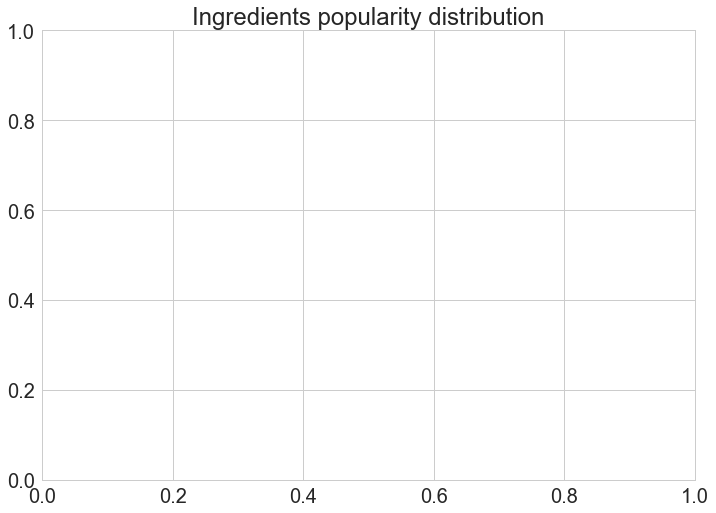

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.set(font_scale=2)
sns.set_style("whitegrid")

plt.title("Ingredients popularity distribution")

_ = sns.barplot(ax=ax, x='count', data=X_train, orient='h', label='big', color='lightseagreen')
plt.tight_layout()
#fig.savefig('ingredient_popularity.pdf')

In [7]:
ingredients = transposed.index.values
ingredients

array(['active_dry_yeast', 'allpurpose_flour', 'avocado', 'bacon',
       'baguette', 'baking_soda', 'basil', 'beans', 'beansprouts', 'beef',
       'bread', 'brown_sugar', 'butter', 'buttermilk', 'cabbage',
       'canola', 'capers', 'carrots', 'cayenne', 'cayenne_pepper',
       'celery', 'cheddar_cheese', 'cheese', 'chicken', 'chicken_breasts',
       'chicken_broth', 'chicken_stock', 'chickpeas', 'chiles', 'chili',
       'chopped_celery', 'chopped_fresh_mint', 'chopped_fresh_thyme',
       'chopped_garlic', 'chopped_onion', 'chopped_parsley', 'cilantro',
       'cilantro_leaves', 'cinnamon', 'clove', 'coconut', 'coconut_milk',
       'cooked_rice', 'cooking_spray', 'coriander', 'coriander_seeds',
       'corn', 'cornmeal', 'cream', 'cucumber', 'cumin', 'cumin_seed',
       'dried_thyme', 'dry_sherry', 'egg_whites', 'eggplant', 'eggs',
       'fillets', 'flank_steak', 'flour', 'fresh_mint', 'fresh_thyme',
       'frozen_corn', 'frozen_peas', 'garlic', 'garlic_cloves',
       'garli

In [15]:
test = transposed.iloc[:, :test.shape[1]-2]
test.head()

,10259,25693,20130,13162,6602,42779,3735,16903,12734,5875,...,26646,44798,8089,6153,25557,24348,7377,29109,11462,2238
active_dry_yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
allpurpose_flour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
avocado,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bacon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
baguette,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(test)

In [16]:
df = pd.DataFrame(X_pca, index=ingredients, columns=['x', 'y'])

ValueError: Shape of passed values is (2, 100), indices imply (2, 267)

In [ ]:
df

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
    
fig.savefig("PCA.pdf")   

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(transposed)

In [ ]:
X_tsne

In [ ]:
X_pca

In [18]:
X_train = pd.read_csv('train_dataset.csv', sep='\t')
X_train = X_train.drop('Unnamed: 0', axis=1)
ingr_count = X_train.sum(axis=0)

In [19]:
X_transposed = X_train.transpose()

In [13]:
X_train

,active_dry_yeast,allpurpose_flour,avocado,bacon,baguette,baking_soda,basil,beans,beansprouts,beef,...,onions_sliced_green,vegetable,potatoes_sweet,vegetable_cooking_spray,vinegar_white,onion_white,pepper_white,vinegar_white_wine,pepper_yellow_bell,cuisine
10259,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,greek
25693,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,southern_us
20130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,filipino
13162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
6602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,jamaican
42779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,spanish
3735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,italian
16903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mexican
12734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,italian
5875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,italian


In [23]:
X_train = X_train.transpose()
X_train["count"] = ingr_count.values

In [24]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,37331,37332,37333,37334,37335,37336,37337,37338,37339,count
active_dry_yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,357
allpurpose_flour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4563
avocado,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1279
bacon,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1124
baguette,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,266
baking_soda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,934
basil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,465
beans,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1489
beansprouts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,454
beef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,807


In [42]:
X_train = X_train.sort_values(by='count', ascending=False)

In [43]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,37331,37332,37333,37334,37335,37336,37337,37338,37339,count
onions,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,8384
olive,0,0,0,0,0,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,7920
sugar,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,7681
garlic,1,0,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,7478
garlic_cloves,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6205
tomatoes,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5366
butter,0,0,1,1,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,5137
pepper,1,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,1,0,0,0,4985
pepper_ground_black,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,4760
allpurpose_flour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4563


In [ ]:
X_train.iloc[:100, :-1]

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train.iloc[:50, :-1])

In [54]:
names = X_train.iloc[:50, :-1].index.values

In [55]:
names

array(['onions', 'olive', 'sugar', 'garlic', 'garlic_cloves', 'tomatoes',
       'butter', 'pepper', 'pepper_ground_black', 'allpurpose_flour',
       'vegetable', 'cheese', 'eggs', 'kosher_salt', 'onions_green',
       'pepper_black', 'milk', 'large_eggs', 'carrots', 'ground_cumin',
       'unsalted_butter', 'extravirgin_olive', 'ginger_fresh',
       'pepper_bell', 'powder_chili', 'chicken', 'rice', 'flour',
       'sesame', 'lime', 'ginger', 'oil', 'lemon', 'purple_onion',
       'parmesan_cheese_grated', 'scallions', 'cream_sour', 'potatoes',
       'chicken_broth', 'starch_corn', 'powder_baking',
       'jalapeno_chilies', 'oregano_dried', 'chopped_onion',
       'cilantro_chopped_fresh', 'paprika', 'tomatoes_diced',
       'juice_fresh_lemon', 'brown_sugar', 'shrimp'], dtype=object)

In [56]:
df = pd.DataFrame(X_pca, index=names, columns=['x', 'y'])

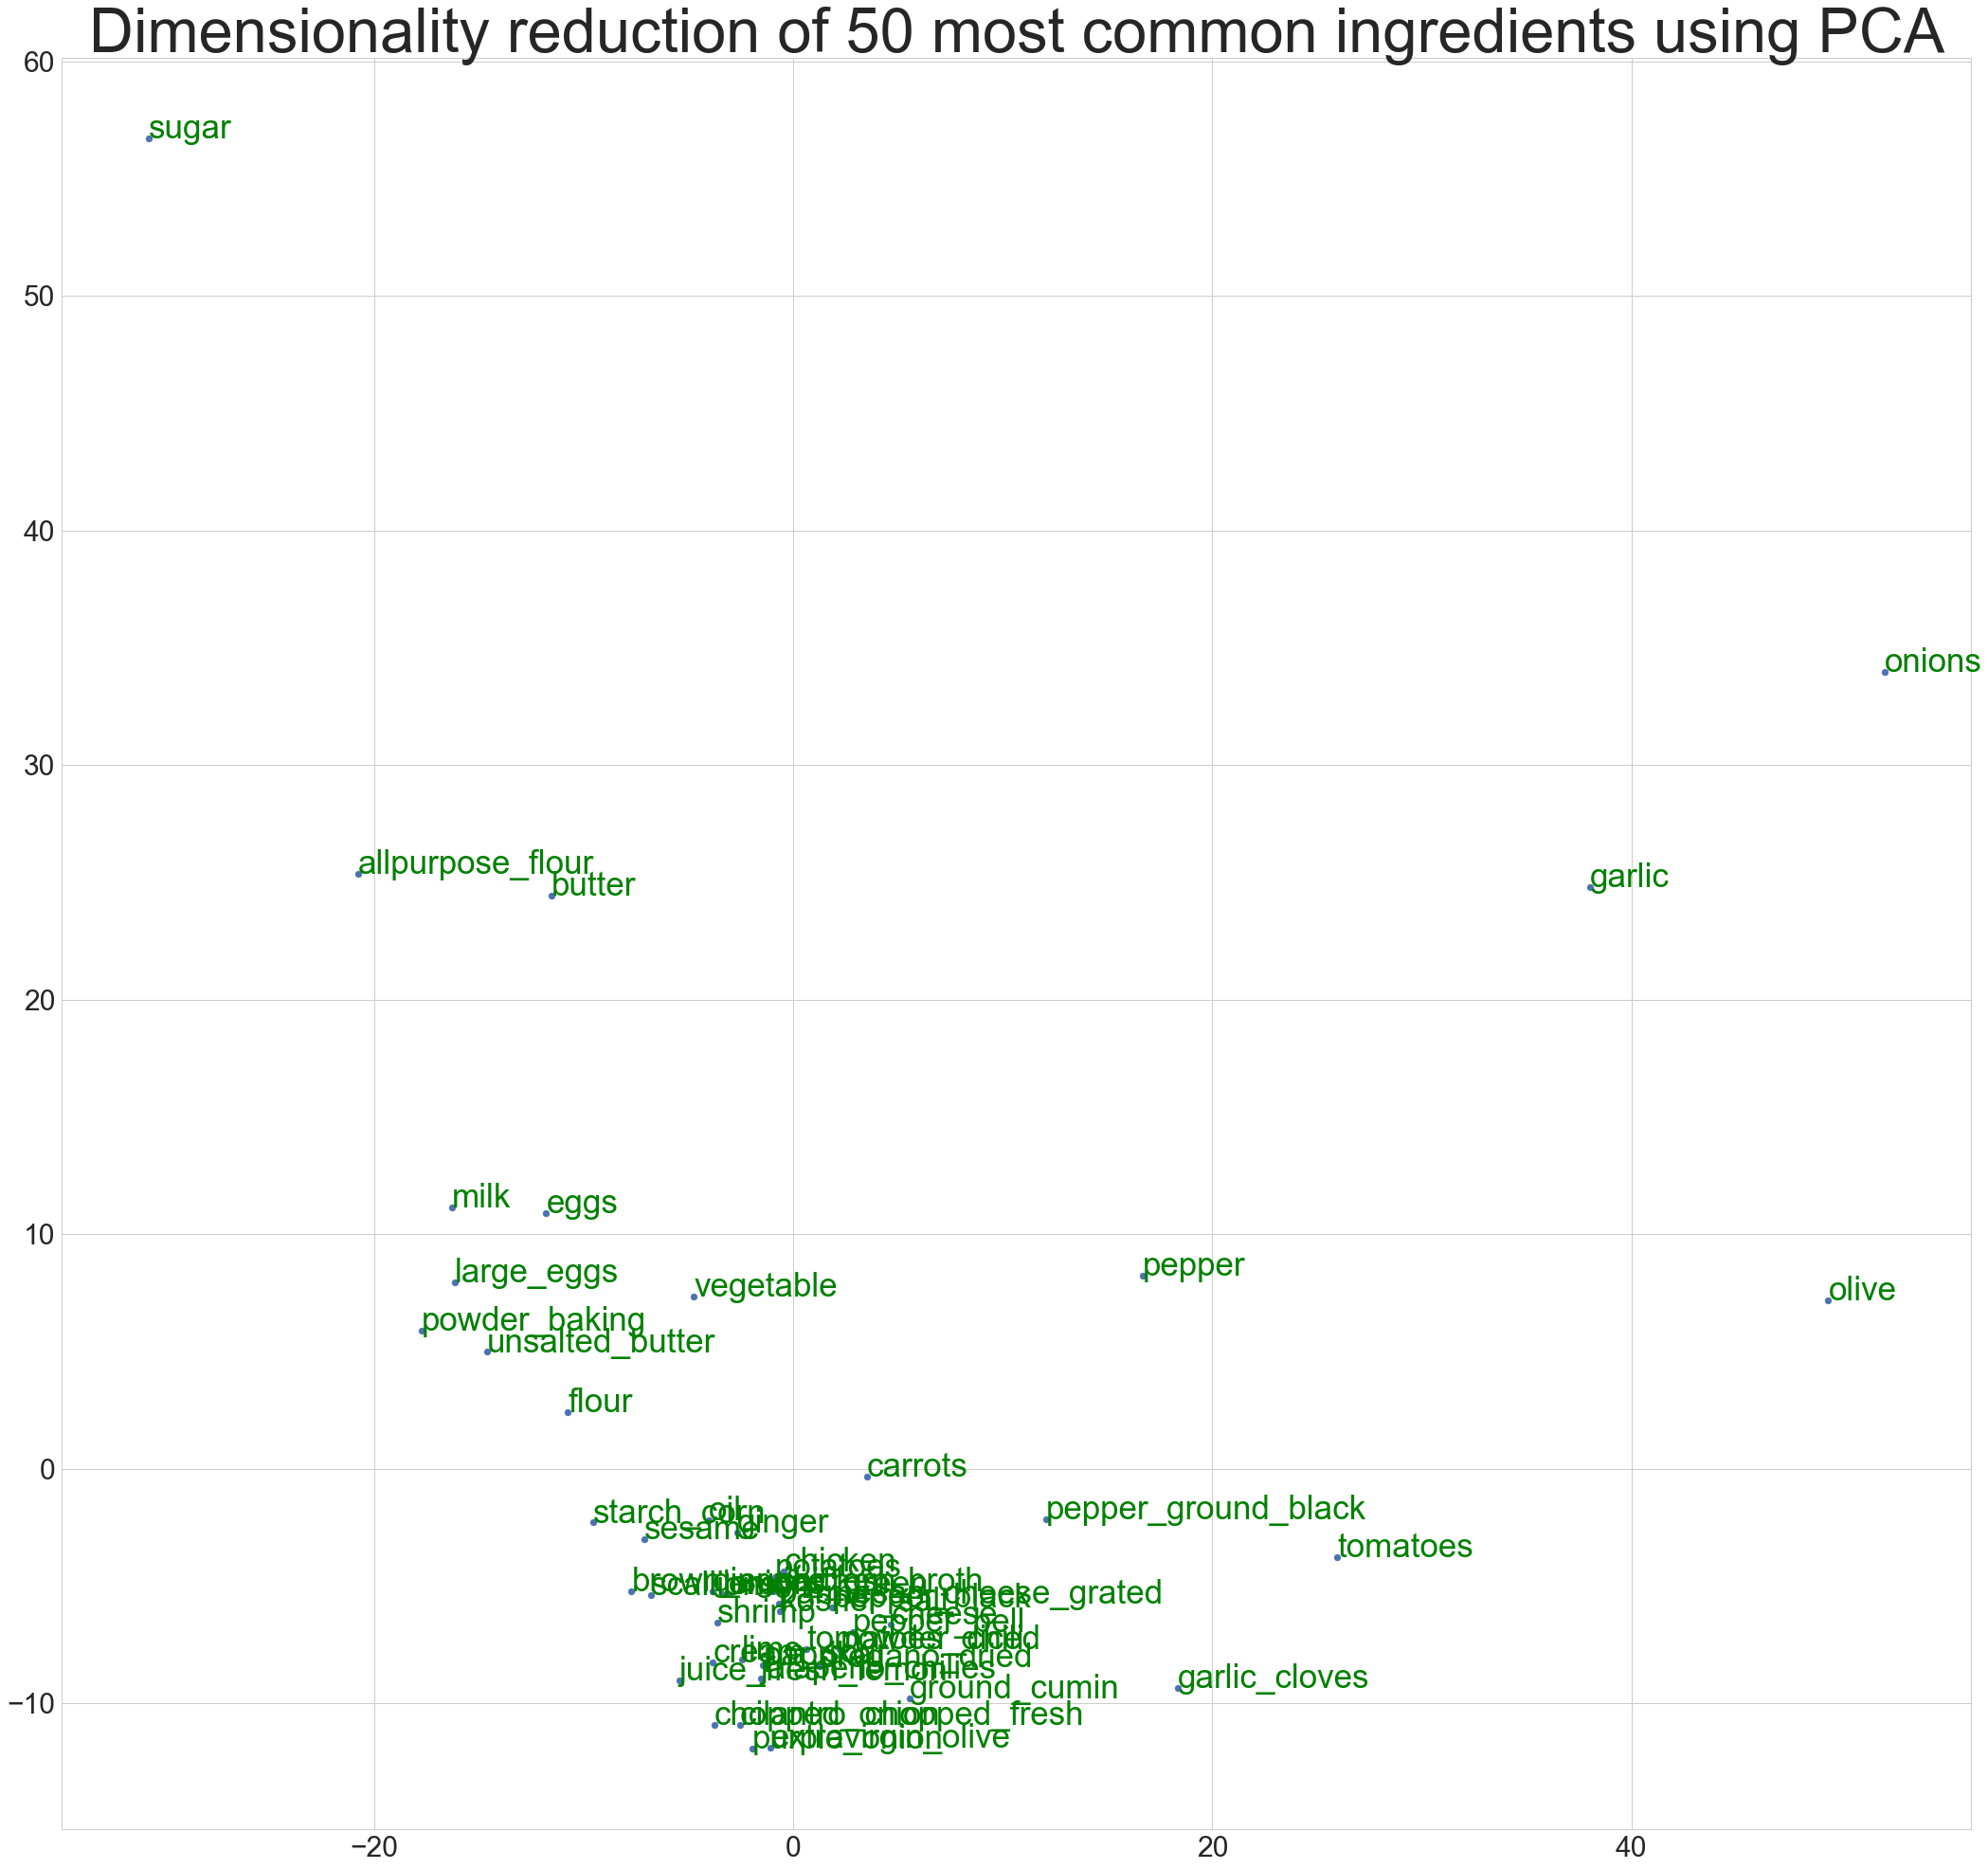

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(31.7, 28.27)
sns.set(font_scale=3)
sns.set_style("whitegrid")
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos, color='green', fontsize=35)
    
plt.title("Dimensionality reduction of 50 most common ingredients using PCA", fontsize=65) 
plt.tight_layout()
fig.savefig("PCA.pdf")   

"|  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a reasonable amount (e.g. 50)
 |  if the number of features is very high.""

In [62]:
from sklearn.decomposition import TruncatedSVD

In [63]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
X = svd.fit_transform(X_train.iloc[:50, :-1])  

In [67]:
names = X_train.iloc[:50, :-1].index.values

In [64]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [70]:
X_tsne

array([[ 3.77398262e+01,  4.53742867e+01],
       [ 8.69831443e-01, -8.00769348e+01],
       [-8.17539368e+01, -3.46394463e+01],
       [-2.00097103e+01,  5.98646126e+01],
       [ 6.70410538e+01,  1.14539719e+01],
       [ 4.65728912e+01, -6.53064957e+01],
       [-8.48895798e+01, -2.94517469e+00],
       [ 6.83943634e+01, -4.55598526e+01],
       [ 1.30028105e+01,  5.78394699e+01],
       [-6.55400238e+01, -1.80818939e+01],
       [-6.57068787e+01,  2.47054138e+01],
       [ 2.07608395e+01, -6.65397110e+01],
       [-6.23379745e+01, -5.21184921e+01],
       [ 6.39664650e+01, -1.47837429e+01],
       [-2.20225563e+01,  3.55566025e+01],
       [ 4.53010178e+01, -3.08092365e+01],
       [-4.31971779e+01, -5.15322456e+01],
       [-5.61249237e+01, -6.38865680e-02],
       [-4.34389420e+01,  3.83169823e+01],
       [-2.07812443e+01, -6.50681458e+01],
       [ 4.14787178e+01,  1.60704021e+01],
       [ 4.39616737e+01, -8.60738087e+00],
       [ 3.02322197e+01, -4.28839874e+01],
       [-5.

In [68]:
df_tsne = pd.DataFrame(X_tsne, index=names, columns=['x', 'y'])

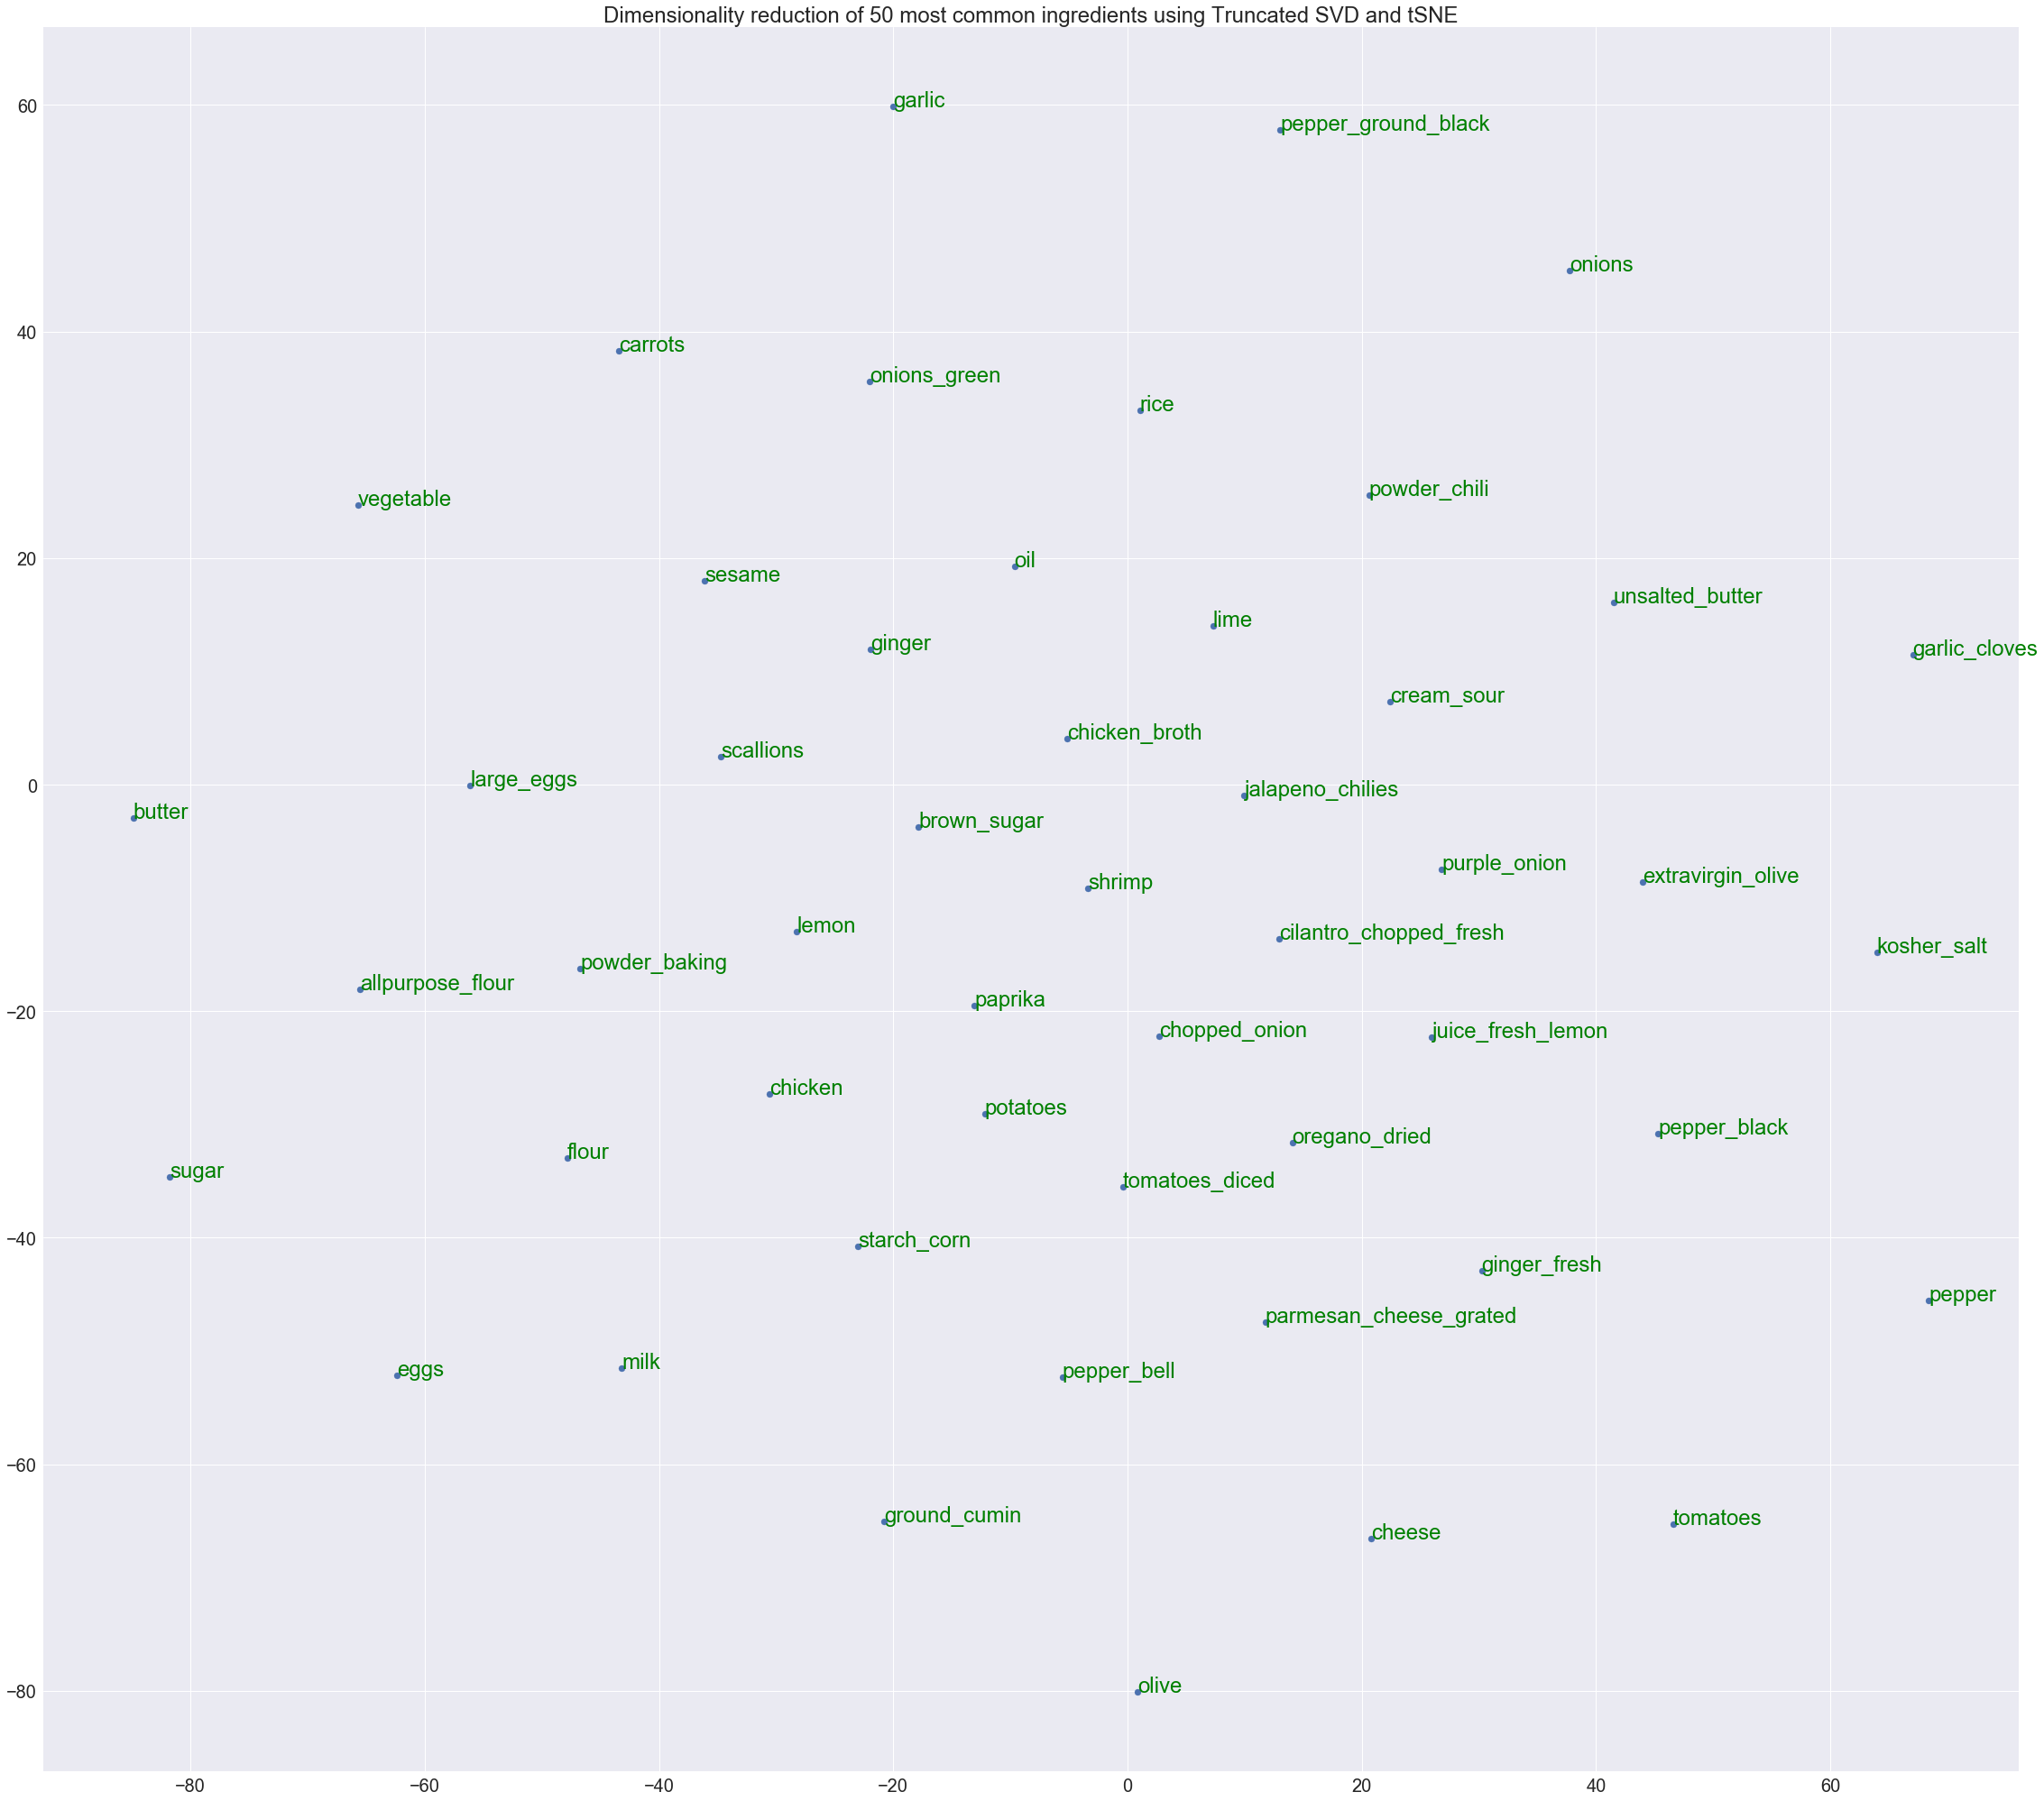

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(31.7, 28.27)
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax.scatter(df_tsne['x'], df_tsne['y'])
for word, pos in df_tsne.iterrows():
    ax.annotate(word, pos, color='green')
    
plt.title("Dimensionality reduction of 50 most common ingredients using Truncated SVD and tSNE")   
plt.tight_layout()
fig.savefig("tSNE.pdf")   

In [ ]:
X_train['name'] = X_train.index.values

In [ ]:
X_train